# Real Estate Investment 

#### Overview of the implementation:
    
    11 Different models are used to predict the price of the house, the major aim is to predict the price based on the 
    some of the important features in the dataset.
    
    Linear and Advanced Regression models are trained and tested rigorously. Various visualizations are created to analyze 
    the data, outlier detection, correlation, accuracy plots, distribution plots, count plots and etc.
    
    Data is cleaned well, the pre-processing stage is carried out to clean the unwanted data, and also incorporate feature
    engineering techniques to enhance the quality of data for Data mining to determine the price prediction
    
    Data is modelled and Data mining techniques are used to further build advanced models for price prediction, the combinations of advanced models is also done to improve the models that are trained

In [267]:
# importing all the required libraries

# sklearn imports
from sklearn.preprocessing import *
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import IsolationForest,GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# plotly imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# scipy and data manipulation imports
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import math

# ml imports
from mlxtend.regressor import StackingCVRegressor,StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [268]:
# Reading a dataframe

df = pd.read_csv('House_Price_Dataset.csv',)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Exploration and Data Pre-processing

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   Seller         34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Rooms2         26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Latitude       26881 non-null  float64
 18  Longit

In [270]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
RegionName           3
PropertyCount        3
dtype: int64

In [271]:
# checking target column 'Price'
df['Price'].unique()

array([     nan, 1480000., 1035000., ..., 2685000., 1671000., 1605500.])

In [272]:
df['Price']

0              NaN
1        1480000.0
2        1035000.0
3              NaN
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 34857, dtype: float64

In [273]:
# creating a copy to work on the dataframe
df_work = df.copy()

In [274]:
# Extracting NaN for price separately which can be later predicted, as these values are not known
df_nan_price = df[df['Price'].isna()]
df_nan_price

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,06/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,06/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,06/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,West Melbourne,9/11 Anderson St,3,u,NaN,S,hockingstuart,24/02/2018,3.1,3003.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,2230.0
34834,Wheelers Hill,112 Jells Rd,4,h,NaN,PN,Harcourts,24/02/2018,16.7,3150.0,...,2.0,2.0,714.0,NaN,NaN,Monash City Council,-37.90287,145.19011,South-Eastern Metropolitan,7392.0
34835,Wheelers Hill,20 Mill Ct,3,h,NaN,S,Barry,24/02/2018,16.7,3150.0,...,2.0,2.0,677.0,NaN,NaN,Monash City Council,-37.91905,145.19105,South-Eastern Metropolitan,7392.0
34845,Windsor,13 Mary St,4,h,NaN,W,Jellis,24/02/2018,4.6,3181.0,...,3.0,2.0,279.0,237.0,2009.0,Port Phillip City Council,-37.85418,144.99697,Southern Metropolitan,4380.0


In [275]:
# Data Cleaning strategies is used which consists of dropping NaN values, imputation of NaN values based on central tendencies
# such as mean, median and mode. The skewed data and outlier detection is also carried out to obtain accuracy of both 
# training and testing models. Various visualization techniques such as uni-variate analysis, bi-variate analysis, correlation matrices
# are also created to analyze the data

### POINT 1 - dropping unknown price values

In [276]:
#dropping nan values if price is zero as this cannot be used for training- but can be used to predict
df_work.dropna(axis=0, subset=['Price'], inplace = True)

In [277]:
df_work.shape

(27247, 21)

In [278]:
df_work.size

572187

In [279]:
df_work.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Latitude          6254
Longitude         6254
RegionName           3
PropertyCount        3
dtype: int64

### POINT 2 - using Rooms value for Rooms2 when Rooms2 is NAN

In [280]:
df_work['Rooms2'].isnull()

1        False
2        False
4        False
5        False
6        False
         ...  
34852    False
34853    False
34854    False
34855     True
34856    False
Name: Rooms2, Length: 27247, dtype: bool

In [281]:
df_work[df_work['Rooms2'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,08/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,08/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,08/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34839,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34840,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34844,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,...,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [282]:
df_work['Rooms2'].iloc[15:22]

23    2.0
24    3.0
25    2.0
26    NaN
27    NaN
28    2.0
29    1.0
Name: Rooms2, dtype: float64

In [283]:
df_work['Rooms'].iloc[15:22]

23    2
24    3
25    2
26    4
27    1
28    2
29    1
Name: Rooms, dtype: int64

In [284]:
df_work['Rooms2'].fillna(df_work['Rooms'], inplace = True)

In [285]:
df_work['Rooms2'].iloc[15:22]

23    2.0
24    3.0
25    2.0
26    4.0
27    1.0
28    2.0
29    1.0
Name: Rooms2, dtype: float64

In [286]:
df_work.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2               0
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Latitude          6254
Longitude         6254
RegionName           3
PropertyCount        3
dtype: int64

### POINT 3 - Postcode and Distance can be filled based on suburban

In [287]:
df_work[df_work['Distance'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,06/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
df_work[df_work['Suburb'] == 'Fawkner Lot']

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,06/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
# There is only one entry with Fawkner lot, identifying similar names
df_work['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [290]:
df_work[df_work['Suburb'] == 'Fawkner']

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
11225,Fawkner,3 Lovely St,3,h,670000.0,S,YPA,03/12/2016,12.4,3060.0,...,1.0,3.0,587.0,136.0,NaN,Hume City Council,-37.70070,144.96320,Northern Metropolitan,5070.0
11227,Fawkner,220 McBryde St,3,h,645000.0,SP,YPA,04/02/2016,12.4,3060.0,...,1.0,4.0,661.0,NaN,NaN,Hume City Council,-37.70090,144.97760,Northern Metropolitan,5070.0
11228,Fawkner,73 Argyle St,3,h,687000.0,S,YPA,04/03/2017,12.4,3060.0,...,1.0,0.0,684.0,NaN,NaN,Hume City Council,-37.71740,144.96640,Northern Metropolitan,5070.0
11229,Fawkner,1/71 Lynch Rd,2,u,333000.0,SP,hockingstuart,04/03/2017,12.4,3060.0,...,1.0,1.0,97.0,79.0,1970.0,Hume City Council,-37.71180,144.96890,Northern Metropolitan,5070.0
11230,Fawkner,2A Piper St,3,t,455000.0,S,Brad,04/03/2017,12.4,3060.0,...,2.0,1.0,738.0,138.0,2010.0,Hume City Council,-37.71090,144.96540,Northern Metropolitan,5070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,Fawkner,42 Tucker St,4,h,945000.0,S,HAR,17/03/2018,13.1,3060.0,...,2.0,6.0,652.0,166.0,1970.0,Hume City Council,-37.70811,144.96968,Northern Metropolitan,5070.0
34241,Fawkner,69 Marlborough St,4,h,879500.0,PI,Raine,24/02/2018,13.1,3060.0,...,1.0,2.0,690.0,NaN,1950.0,Hume City Council,-37.71829,144.96605,Northern Metropolitan,5070.0
34242,Fawkner,25 William St,3,h,728000.0,S,Ray,24/02/2018,13.1,3060.0,...,1.0,4.0,584.0,122.0,1960.0,Hume City Council,-37.70428,144.96717,Northern Metropolitan,5070.0
34243,Fawkner,33 Wymlet St,3,h,662500.0,PI,McGrath,24/02/2018,13.1,3060.0,...,1.0,2.0,609.0,NaN,NaN,Hume City Council,-37.71179,144.96594,Northern Metropolitan,5070.0


In [291]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   Seller         27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Rooms2         27247 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Latitude       20993 non-null  float64
 18  Longit

In [292]:
# Suburb can be used to fill postcode and distance missing value
df_work['Distance'].fillna(13.1, inplace = True)
df_work['Postcode'].fillna(3060, inplace = True)

In [293]:
df_work.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2               0
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Latitude          6254
Longitude         6254
RegionName           3
PropertyCount        3
dtype: int64

### POINT 4 - Simplest approach to replace Bathroom and Car is mode - the one that is most repeated
###  same thing for council area and region name - categorical values

In [294]:
bathroom_mode = df_work.Bathroom.mode()
bathroom_mode

0    1.0
dtype: float64

In [295]:
bathroom_mode[0]

1.0

In [296]:
car_mode = df_work.Car.mode()
car_mode

0    2.0
dtype: float64

In [297]:
car_mode[0]

2.0

In [298]:
df_work['Bathroom'].fillna(bathroom_mode[0], inplace = True)
df_work['Car'].fillna(car_mode[0], inplace = True)

In [299]:
df_work['CouncilArea'].fillna(df_work.CouncilArea.mode()[0], inplace = True)
df_work['RegionName'].fillna(df_work.RegionName.mode()[0], inplace = True)

In [300]:
df_work.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2               0
Bathroom             0
Car                  0
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          0
Latitude          6254
Longitude         6254
RegionName           0
PropertyCount        3
dtype: int64

In [301]:
df_work.shape

(27247, 21)

## Point 5 - more missing values for BuildingArea, YearBuilt and Landsize - check again before fitting model using these features

In [302]:
# 1. As cleaning Landsize and BuildingArea are replaced by mean values
# 2. YearBuilt is replaced by median as it is the year created

In [303]:
df_work['Landsize'].fillna(df_work.Landsize.mean(), inplace = True)

In [304]:
df_work['BuildingArea'].fillna(df_work.BuildingArea.mean(), inplace = True)

In [305]:
df_work['YearBuilt'].fillna(df_work.YearBuilt.median(), inplace = True)

In [306]:
df_work['YearBuilt'].unique()

array([1970., 1900., 2014., 1910., 1890., 2005., 2009., 1880., 1985.,
       2010., 2013., 2012., 1920., 1950., 1998., 1930., 2016., 1965.,
       1980., 2011., 2015., 1975., 1993., 1960., 2003., 1995., 1996.,
       2000., 1925., 2004., 2008., 1962., 1955., 1988., 1953., 1997.,
       1990., 2007., 1967., 1964., 1889., 1888., 2006., 1934., 1935.,
       1966., 1969., 1940., 1938., 1887., 1904., 1972., 1978., 1939.,
       1945., 1947., 1958., 2017., 1999., 1992., 1961., 1928., 1977.,
       1976., 2001., 1948., 1927., 1981., 1943., 1974., 1968., 1957.,
       1987., 1986., 1926., 2002., 1994., 1949., 1905., 1912., 1924.,
       1952., 1991., 1942., 1973., 1915., 2018., 1916., 1982., 1971.,
       1963., 1897., 1989., 1919., 1923., 1983., 1903., 1830., 1895.,
       1937., 1908., 1913., 1917., 1885., 1902., 1854., 1850., 1898.,
       1941., 1951., 1946., 1956., 1984., 1901., 1959., 1979., 1933.,
       1886., 1929., 1906., 1870., 1932., 1875., 1863., 1918., 1893.,
       1856., 1860.,

In [307]:
df_work.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Rooms2              0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Latitude         6254
Longitude        6254
RegionName          0
PropertyCount       3
dtype: int64

In [308]:
# Latitude and Longitude can be left untreated as we do not use it for training, either it can be replaced with zero or
#  left untreated as it is not used to build models

In [309]:
df_work[df_work['PropertyCount'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,1.0,2.0,593.488933,156.834586,1970.0,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,1.0,2.0,593.488933,156.834586,1970.0,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,06/01/2018,13.1,3060.0,...,1.0,2.0,593.488933,156.834586,1970.0,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN


In [310]:
df_work.dropna(axis=0, subset=['PropertyCount'], inplace = True)

In [311]:
df_work[df_work['PropertyCount'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount


In [312]:
# Identifying Categorical and numerical attributes
categorical, numerical = [],[]
for c in df_work.columns:
    t = df_work.dtypes[c]
    if t=='object':
        categorical.append(c)
    else:
        numerical.append(c)
print("\nCATEGORICAL:")
print(categorical)
print("\nNUMERICAL:")
print(numerical)


CATEGORICAL:
['Suburb', 'Address', 'Type', 'Method', 'Seller', 'Date', 'CouncilArea', 'RegionName']

NUMERICAL:
['Rooms', 'Price', 'Distance', 'Postcode', 'Rooms2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude', 'PropertyCount']


### Feature addition/ Feature Engineering

In [313]:
#1. Age of the house is calculated to use for model building

today = date.today()
def calculate_age(YearBuilt):
    YearBuilt = str(YearBuilt)
    built = datetime.strptime(YearBuilt, "%Y").date()
    return today.year - built.year 

In [314]:
df_work['YearBuilt'] = df_work['YearBuilt'].astype(int)

In [315]:
# Clear NAN values before doing this
df_work['HouseAge'] = df_work['YearBuilt'].apply(calculate_age)
df.head() 

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [316]:
df_work['HouseAge']

1         51
2        121
4        121
5         51
6          7
        ... 
34852     51
34853      3
34854     21
34855     51
34856     91
Name: HouseAge, Length: 27244, dtype: int64

In [317]:
#2. Average of rooms is carried out to create avgrooms from both Rooms and Rooms2 which is obtained from different source

In [320]:
df_work['AvgRooms'] = ((df_work['Rooms'] + df_work['Rooms2'])/2).astype(int)

In [321]:
df_work['AvgRooms']

1        2
2        2
4        3
5        3
6        3
        ..
34852    4
34853    2
34854    2
34855    3
34856    2
Name: AvgRooms, Length: 27244, dtype: int32

## Visualization techniques to better understand the data and clean outliers whereever necessary

In [322]:
# Various techniques such as uni-variate, bi-variate, multivariate analysis is carried out 

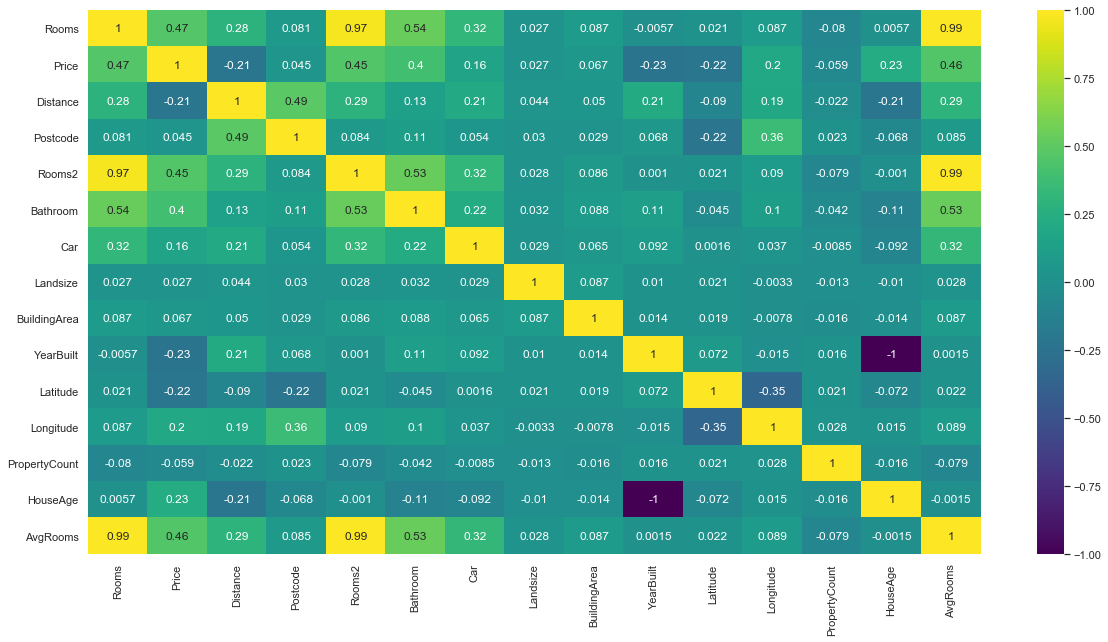

In [323]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_work.corr(),annot=True,cmap='viridis')

In [324]:
# some observations:
#     1. rooms and rooms2 are highly correlated - the data from different sources positively
#         Rooms negatively correlated with 'PropertyCount'
#     2. price 
#         positive correlation rooms,rooms2,bathroom,car and longitude, Building Area
#         Negative correlation YearBuilt, distance, Latitude

Text(0.5, 1.0, 'Price')

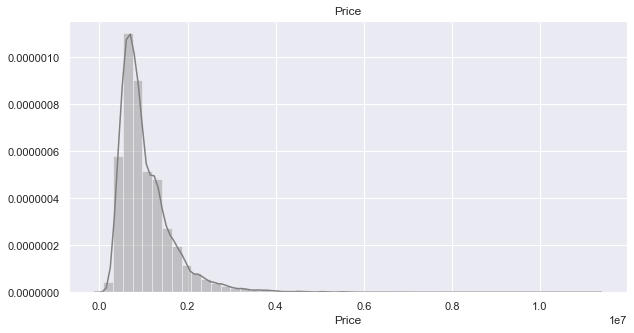

In [325]:
# distance plot to determine peak and outlier data

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,5)})

sns.distplot(a = df_work['Price'], bins = 50, color = 'gray', vertical = False
            ).set_title('Price')

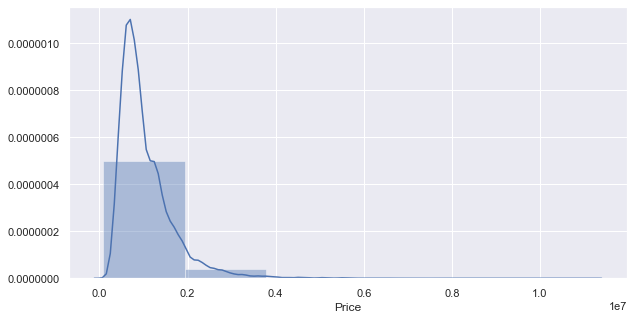

In [326]:
# Distance plot with less bins

sns.distplot(df_work['Price'],kde=True,hist=True,bins=6 )

In [327]:
# Correlation matrix for multivariate analysis and to identify correlation between different attributes

corr = df_work.corr()

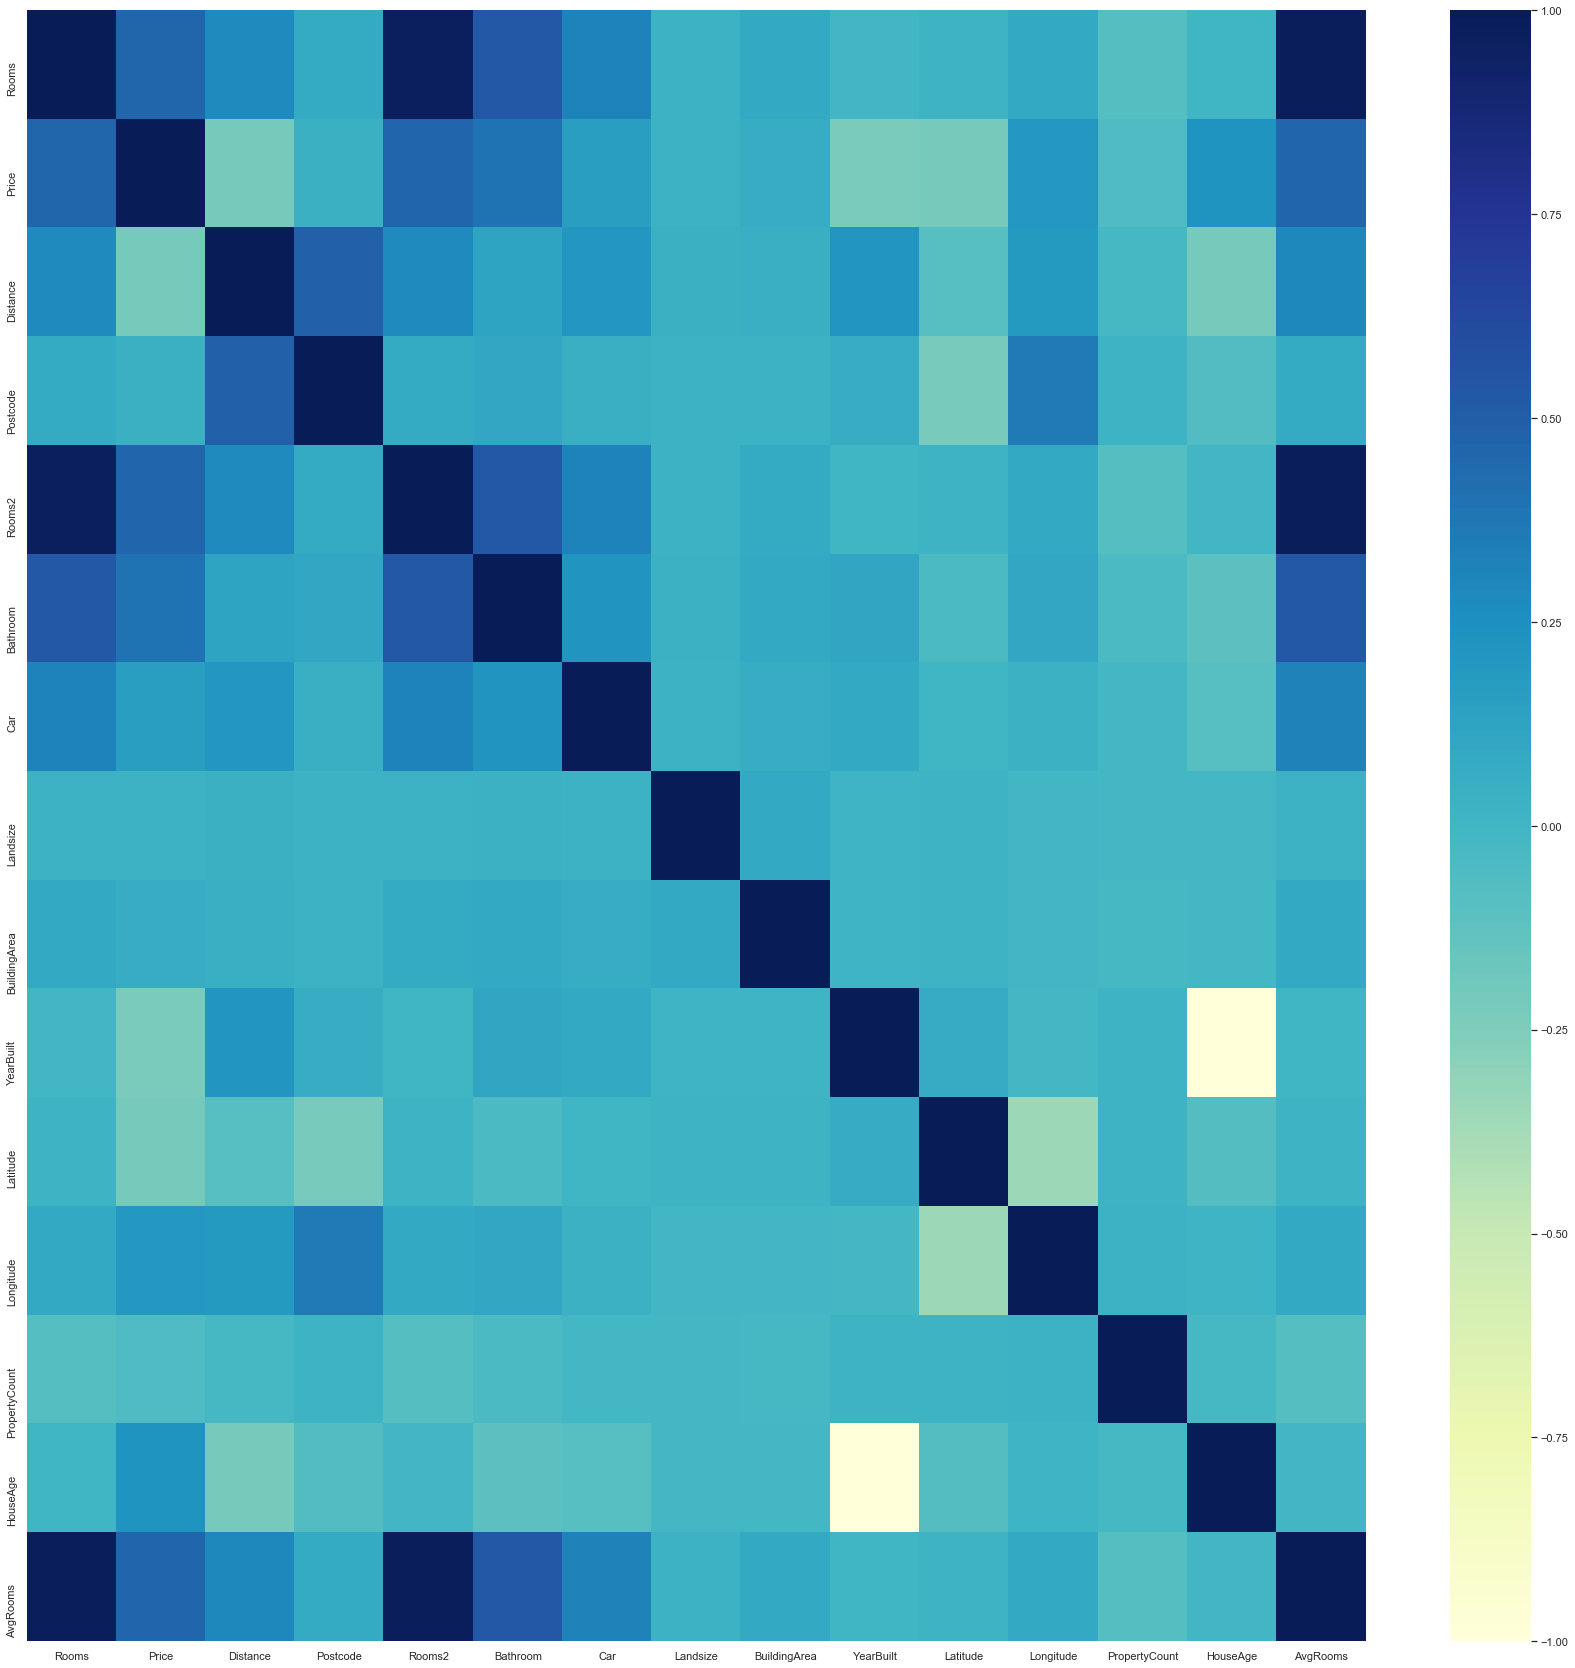

In [328]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(30,30)})

sns.heatmap(corr, cmap="YlGnBu")

### countplots

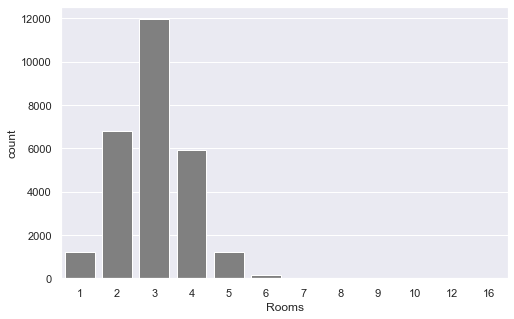

In [329]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df_work['Rooms'], color = 'gray')

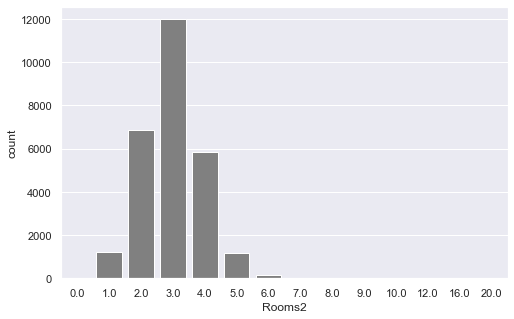

In [330]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df_work['Rooms2'], color = 'gray')

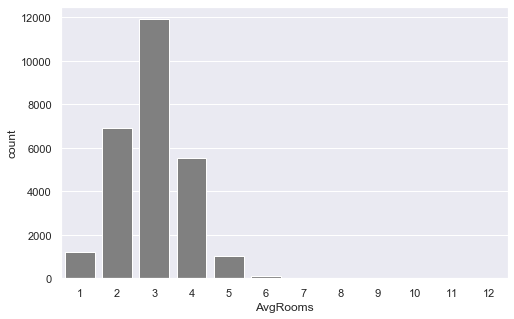

In [494]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df_work['AvgRooms'], color = 'gray')

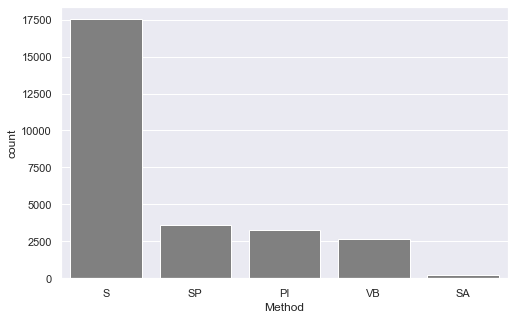

In [331]:
# countplots for the method

sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df_work['Method'], color = 'gray')

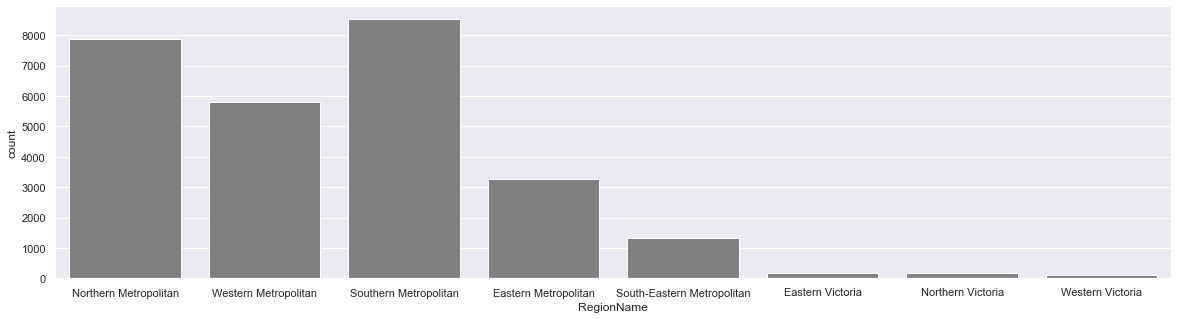

In [332]:
# count plot for regionname

sns.set(rc={'figure.figsize':(20, 5)})
sns.countplot(df_work['RegionName'], color = 'gray')


### Scatterplots

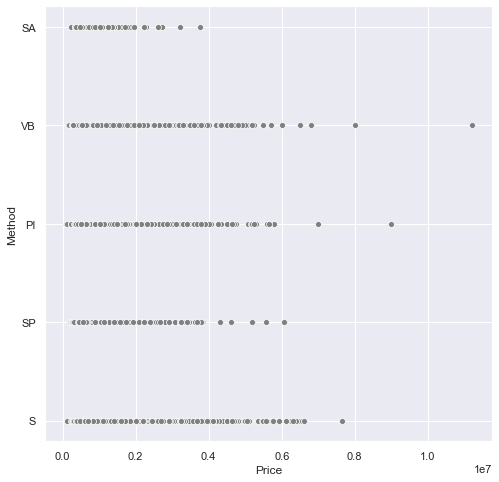

In [333]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(x = "Price", y = "Method", data = df_work, color = "gray")

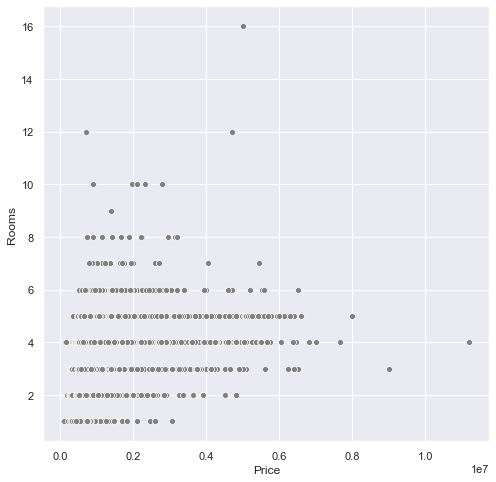

In [334]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(x = "Price", y = "Rooms", data = df_work, color = "gray")

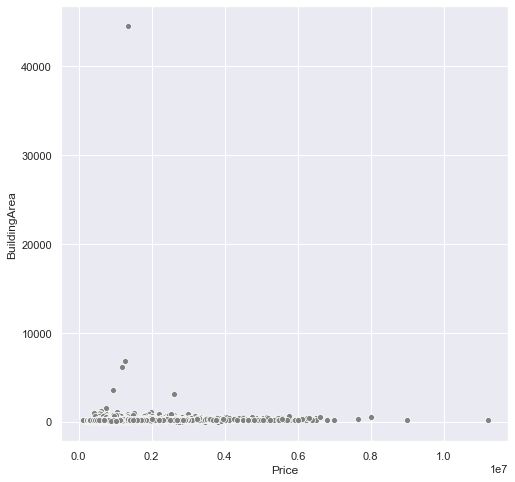

In [335]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(x = "Price", y = "BuildingArea", data = df_work, color = "gray")

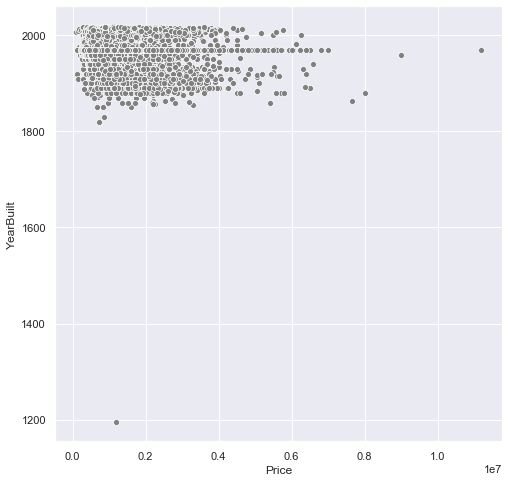

In [336]:
sns.scatterplot(x = "Price", y = "YearBuilt", data = df_work, color = "gray")

### Outlier Removal using Z-score

In [337]:
xfilter = df_work[[col for col in df_work.columns if col in ['Price']]]
z_scores = stats.zscore(xfilter)
z_scores

abs_z_scores = np.abs(z_scores)
abs_z_scores

filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_entries

df_work = df_work[filtered_entries]
df_work

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount,HouseAge,AvgRooms
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,202.000000,156.834586,1970,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,51,2
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,156.000000,79.000000,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,121,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,134.000000,150.000000,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,121,3
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,04/03/2017,2.5,3067.0,...,94.000000,156.834586,1970,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,51,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04/06/2016,2.5,3067.0,...,120.000000,142.000000,2014,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,593.000000,156.834586,1970,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,51,4
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,98.000000,104.000000,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,3,2
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,220.000000,120.000000,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,21,2
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,593.488933,156.834586,1970,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,51,3


Text(0.5, 1.0, 'Price')

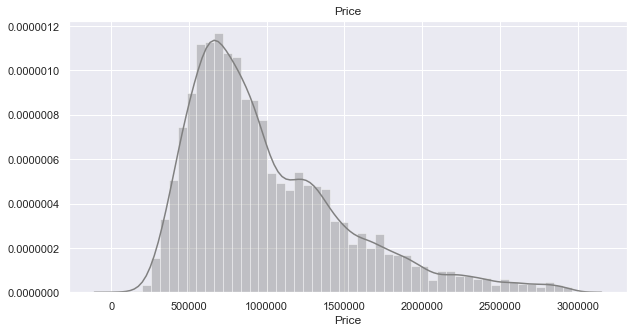

In [338]:
# distance plot to determine peak and outlier data

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,5)})

sns.distplot(a = df_work['Price'], bins = 50, color = 'gray', vertical = False
            ).set_title('Price')

In [339]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26770 non-null  object 
 1   Address        26770 non-null  object 
 2   Rooms          26770 non-null  int64  
 3   Type           26770 non-null  object 
 4   Price          26770 non-null  float64
 5   Method         26770 non-null  object 
 6   Seller         26770 non-null  object 
 7   Date           26770 non-null  object 
 8   Distance       26770 non-null  float64
 9   Postcode       26770 non-null  float64
 10  Rooms2         26770 non-null  float64
 11  Bathroom       26770 non-null  float64
 12  Car            26770 non-null  float64
 13  Landsize       26770 non-null  float64
 14  BuildingArea   26770 non-null  float64
 15  YearBuilt      26770 non-null  int32  
 16  CouncilArea    26770 non-null  object 
 17  Latitude       20593 non-null  float64
 18  Longit

# Building Model

In [340]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26770 non-null  object 
 1   Address        26770 non-null  object 
 2   Rooms          26770 non-null  int64  
 3   Type           26770 non-null  object 
 4   Price          26770 non-null  float64
 5   Method         26770 non-null  object 
 6   Seller         26770 non-null  object 
 7   Date           26770 non-null  object 
 8   Distance       26770 non-null  float64
 9   Postcode       26770 non-null  float64
 10  Rooms2         26770 non-null  float64
 11  Bathroom       26770 non-null  float64
 12  Car            26770 non-null  float64
 13  Landsize       26770 non-null  float64
 14  BuildingArea   26770 non-null  float64
 15  YearBuilt      26770 non-null  int32  
 16  CouncilArea    26770 non-null  object 
 17  Latitude       20593 non-null  float64
 18  Longit

In [341]:
df_work.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Rooms2              0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Latitude         6177
Longitude        6177
RegionName          0
PropertyCount       0
HouseAge            0
AvgRooms            0
dtype: int64

In [342]:
# Generalized x value to remove not required columns for further model building
x = df_work[[col for col in df_work.columns if col not in ['Price', 'Latitude','Longitude']]]

In [343]:
y = df_work['Price']

In [344]:
x

,Suburb,Address,Rooms,Type,Method,Seller,Date,Distance,Postcode,Rooms2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount,HouseAge,AvgRooms
1,Abbotsford,85 Turner St,2,h,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.000000,156.834586,1970,Yarra City Council,Northern Metropolitan,4019.0,51,2
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,1900,Yarra City Council,Northern Metropolitan,4019.0,121,2
4,Abbotsford,5 Charles St,3,h,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,1900,Yarra City Council,Northern Metropolitan,4019.0,121,3
5,Abbotsford,40 Federation La,3,h,PI,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,1.0,94.000000,156.834586,1970,Yarra City Council,Northern Metropolitan,4019.0,51,3
6,Abbotsford,55a Park St,4,h,VB,Nelson,04/06/2016,2.5,3067.0,3.0,1.0,2.0,120.000000,142.000000,2014,Yarra City Council,Northern Metropolitan,4019.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.000000,156.834586,1970,Maribyrnong City Council,Western Metropolitan,6543.0,51,4
34853,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.000000,104.000000,2018,Maribyrnong City Council,Western Metropolitan,6543.0,3,2
34854,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.000000,120.000000,2000,Maribyrnong City Council,Western Metropolitan,6543.0,21,2
34855,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018,6.3,3013.0,3.0,1.0,2.0,593.488933,156.834586,1970,Maribyrnong City Council,Western Metropolitan,6543.0,51,3


In [345]:
x = pd.get_dummies(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Columns: 27118 entries, Rooms to RegionName_Western Victoria
dtypes: float64(8), int32(2), int64(2), uint8(27106)
memory usage: 694.5 MB


In [346]:
x.isnull().sum()

Rooms                                    0
Distance                                 0
Postcode                                 0
Rooms2                                   0
Bathroom                                 0
                                        ..
RegionName_Northern Victoria             0
RegionName_South-Eastern Metropolitan    0
RegionName_Southern Metropolitan         0
RegionName_Western Metropolitan          0
RegionName_Western Victoria              0
Length: 27118, dtype: int64

In [107]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 26066, dtype: float64

### 1. Linear Regression model

In [552]:
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size = 0.30,random_state=5)

In [555]:
X_train.shape

(18739, 27118)

In [556]:
X_test.shape

(8031, 27118)

In [557]:
lm = LinearRegression()
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [558]:
type(lm)

sklearn.linear_model._base.LinearRegression

In [559]:
print(lm.intercept_)
print(lm.coef_)

-24751827030114.508
[-368788.19186959   25757.70891693   -3675.73604656 ...  261724.88226237
  215825.99341684   78124.3356746 ]


In [560]:
pred_y = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

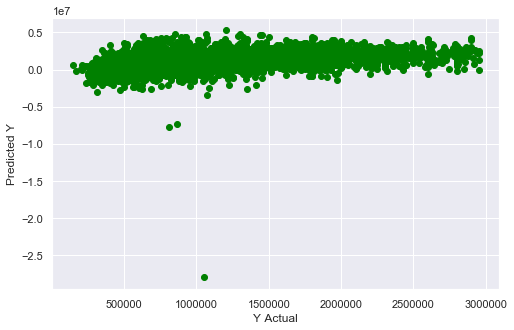

In [561]:
### Visualtion of predictive results
plt.scatter(y_test,pred_y,color='green',cmap='viridis')

plt.xlabel('Y Actual') 
plt.ylabel('Predicted Y')

In [562]:
y_test

11652     861500.0
2044     2550000.0
27097     793000.0
22677    1540000.0
17883    1750000.0
           ...    
26842     464000.0
10525     556000.0
16102     810000.0
11360    1700000.0
12187     881000.0
Name: Price, Length: 8031, dtype: float64

In [563]:
pred_y

array([ 353515.2421875 , 2180961.12109375,  745323.86328125, ...,
        547707.78125   , 2009545.66015625, 2096574.203125  ])

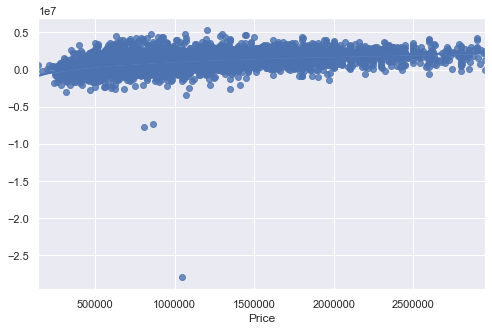

In [564]:
sns.regplot(y_test,pred_y,logx = True)

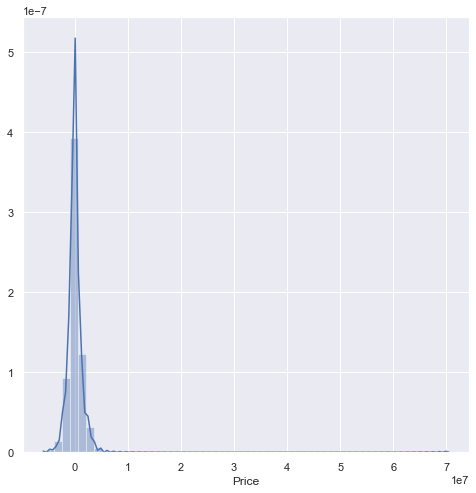

In [88]:
sns.distplot((y_test-pred_y))

### Evaluation metrices

In [89]:
### run mean absolute error between actual y (y_test) and predicted y (pred_y)
metrics.mean_absolute_error(y_test,pred_y)

870087.9921735218

In [90]:
#### MEAN SQUARED ERROR   between actual y (y_test) and predicted y (pred_y)
metrics.mean_squared_error(y_test,pred_y)

2117854798588.975

In [91]:
#### RMSE -   between actual y (y_test) and predicted y (pred_y)
np.sqrt(metrics.mean_squared_error(y_test,pred_y))

1455285.1262171874

In [232]:
math.log(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

14.19071240242535

In [92]:
### calculate variance. Closer the value is to 1 ,  higher is the model accuracy
lm.score(X_test,y_test)

-3.8375483919776725

In [93]:
### training accuracy
lm.score(X_train,y_train)

0.9999534218824492

#### This is a classic example of overfitting the model which has high variance and low Bias and this does not support prediction. 
#### Therefore, further trials are carried out to fit the model appropriately

### Trail 2

In [347]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26770 non-null  object 
 1   Address        26770 non-null  object 
 2   Rooms          26770 non-null  int64  
 3   Type           26770 non-null  object 
 4   Price          26770 non-null  float64
 5   Method         26770 non-null  object 
 6   Seller         26770 non-null  object 
 7   Date           26770 non-null  object 
 8   Distance       26770 non-null  float64
 9   Postcode       26770 non-null  float64
 10  Rooms2         26770 non-null  float64
 11  Bathroom       26770 non-null  float64
 12  Car            26770 non-null  float64
 13  Landsize       26770 non-null  float64
 14  BuildingArea   26770 non-null  float64
 15  YearBuilt      26770 non-null  int32  
 16  CouncilArea    26770 non-null  object 
 17  Latitude       20593 non-null  float64
 18  Longit

In [351]:
x1 = df_work[[col for col in df_work.columns if col in ['AvgRooms', 'Method','Car']]]

In [352]:
x1

,Method,Car,AvgRooms
1,S,1.0,2
2,S,0.0,2
4,SP,0.0,3
5,PI,1.0,3
6,VB,2.0,3
...,...,...,...
34852,PI,3.0,4
34853,SP,1.0,2
34854,S,2.0,2
34855,SP,2.0,3


In [353]:
x1 = pd.get_dummies(x1)
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car        26770 non-null  float64
 1   AvgRooms   26770 non-null  int32  
 2   Method_PI  26770 non-null  uint8  
 3   Method_S   26770 non-null  uint8  
 4   Method_SA  26770 non-null  uint8  
 5   Method_SP  26770 non-null  uint8  
 6   Method_VB  26770 non-null  uint8  
dtypes: float64(1), int32(1), uint8(5)
memory usage: 653.6 KB


In [354]:
X_train1, X_test1, y_train1, y_test1 =train_test_split(x1,y, test_size = 0.30,random_state=5)

In [355]:
X_train1.shape

(18739, 7)

In [356]:
X_test1.shape

(8031, 7)

In [357]:
lm = LinearRegression()
lm.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [358]:
type(lm)

sklearn.linear_model._base.LinearRegression

In [359]:
print(lm.intercept_)
print(lm.coef_)

-4.718761551555031e+18
[-3.85275186e+03  2.48464566e+05  4.71876155e+18  4.71876155e+18
  4.71876155e+18  4.71876155e+18  4.71876155e+18]


In [360]:
pred_y1 = lm.predict(X_test1)

### Evaluation

In [361]:
### run mean absolute error between actual y (y_test) and predicted y (pred_y)
metrics.mean_absolute_error(y_test1,pred_y1)

345887.6643008343

In [362]:
#### MEAN SQUARED ERROR   between actual y (y_test) and predicted y (pred_y)
metrics.mean_squared_error(y_test1,pred_y1)

203983364762.86365

In [363]:
#### RMSE -   between actual y (y_test) and predicted y (pred_y)
np.sqrt(metrics.mean_squared_error(y_test1,pred_y1))

451645.1757329681

In [364]:
### calculate variance. Closer the value is to 1 ,  higher is the model accuracy
lm.score(X_test1,y_test1)

0.2247296828777985

In [365]:
### training accuracy
lm.score(X_train1,y_train1)

0.22134032634881673

### Trail 3

In [366]:
#  2. price 
#         positive correlation rooms,rooms2,bathroom,car and longitude, Building Area
#         Negative correlation YearBuilt, distance, Latitude

In [367]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26770 non-null  object 
 1   Address        26770 non-null  object 
 2   Rooms          26770 non-null  int64  
 3   Type           26770 non-null  object 
 4   Price          26770 non-null  float64
 5   Method         26770 non-null  object 
 6   Seller         26770 non-null  object 
 7   Date           26770 non-null  object 
 8   Distance       26770 non-null  float64
 9   Postcode       26770 non-null  float64
 10  Rooms2         26770 non-null  float64
 11  Bathroom       26770 non-null  float64
 12  Car            26770 non-null  float64
 13  Landsize       26770 non-null  float64
 14  BuildingArea   26770 non-null  float64
 15  YearBuilt      26770 non-null  int32  
 16  CouncilArea    26770 non-null  object 
 17  Latitude       20593 non-null  float64
 18  Longit

In [368]:
x2 = df_work[[col for col in df_work.columns if col in ['AvgRooms', 'Method','Car','Bathroom','BuildingArea','HouseAge','Distance']]]

In [369]:
x2

,Method,Distance,Bathroom,Car,BuildingArea,HouseAge,AvgRooms
1,S,2.5,1.0,1.0,156.834586,51,2
2,S,2.5,1.0,0.0,79.000000,121,2
4,SP,2.5,2.0,0.0,150.000000,121,3
5,PI,2.5,2.0,1.0,156.834586,51,3
6,VB,2.5,1.0,2.0,142.000000,7,3
...,...,...,...,...,...,...,...
34852,PI,6.3,1.0,3.0,156.834586,51,4
34853,SP,6.3,2.0,1.0,104.000000,3,2
34854,S,6.3,1.0,2.0,120.000000,21,2
34855,SP,6.3,1.0,2.0,156.834586,51,3


In [370]:
x2 = pd.get_dummies(x2)
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Distance      26770 non-null  float64
 1   Bathroom      26770 non-null  float64
 2   Car           26770 non-null  float64
 3   BuildingArea  26770 non-null  float64
 4   HouseAge      26770 non-null  int64  
 5   AvgRooms      26770 non-null  int32  
 6   Method_PI     26770 non-null  uint8  
 7   Method_S      26770 non-null  uint8  
 8   Method_SA     26770 non-null  uint8  
 9   Method_SP     26770 non-null  uint8  
 10  Method_VB     26770 non-null  uint8  
dtypes: float64(4), int32(1), int64(1), uint8(5)
memory usage: 1.5 MB


In [371]:
x2

,Distance,Bathroom,Car,BuildingArea,HouseAge,AvgRooms,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,2.5,1.0,1.0,156.834586,51,2,0,1,0,0,0
2,2.5,1.0,0.0,79.000000,121,2,0,1,0,0,0
4,2.5,2.0,0.0,150.000000,121,3,0,0,0,1,0
5,2.5,2.0,1.0,156.834586,51,3,1,0,0,0,0
6,2.5,1.0,2.0,142.000000,7,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
34852,6.3,1.0,3.0,156.834586,51,4,1,0,0,0,0
34853,6.3,2.0,1.0,104.000000,3,2,0,0,0,1,0
34854,6.3,1.0,2.0,120.000000,21,2,0,1,0,0,0
34855,6.3,1.0,2.0,156.834586,51,3,0,0,0,1,0


In [372]:
X_train2, X_test2, y_train2, y_test2 =train_test_split(x2,y, test_size = 0.30,random_state=5)

In [373]:
lm2 = LinearRegression()
lm2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [374]:
print(lm2.intercept_)
print(lm2.coef_)

46386.599543779856
[-2.55215434e+04  1.57782172e+05  2.95987620e+04  3.46627312e+01
  4.54657469e+03  2.42065900e+05 -1.86270810e+04  2.57399185e+04
  5.69296697e+04 -8.32971071e+04  1.92545999e+04]


In [375]:
pred_y2 = lm2.predict(X_test2)

### Evaluation

In [376]:
print(metrics.mean_absolute_error(y_test2,pred_y2))
print(metrics.mean_squared_error(y_test2,pred_y2))
print(np.sqrt(metrics.mean_squared_error(y_test2,pred_y2)))

293308.18032542855
152022135994.81516
389900.16157320986


In [377]:
### calculate variance. Closer the value is to 1 ,  higher is the model accuracy
lm2.score(X_test2,y_test2)

0.4222163669115455

In [378]:
### training accuracy
lm2.score(X_train2,y_train2)

0.4213876505902434

### Trail 4 and Trail 5

In [379]:
# use - propertycount, Latitude, yearbuilt, building area, rooms, Distance. Also, regionname and Method

In [380]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26770 non-null  object 
 1   Address        26770 non-null  object 
 2   Rooms          26770 non-null  int64  
 3   Type           26770 non-null  object 
 4   Price          26770 non-null  float64
 5   Method         26770 non-null  object 
 6   Seller         26770 non-null  object 
 7   Date           26770 non-null  object 
 8   Distance       26770 non-null  float64
 9   Postcode       26770 non-null  float64
 10  Rooms2         26770 non-null  float64
 11  Bathroom       26770 non-null  float64
 12  Car            26770 non-null  float64
 13  Landsize       26770 non-null  float64
 14  BuildingArea   26770 non-null  float64
 15  YearBuilt      26770 non-null  int32  
 16  CouncilArea    26770 non-null  object 
 17  Latitude       20593 non-null  float64
 18  Longit

In [399]:
x3 = df_work[[col for col in df_work.columns if col in ['AvgRooms', 'Method','Car','Bathroom','BuildingArea','HouseAge','Distance']]]

In [400]:
x4 = df_work[[col for col in df_work.columns if col in ['AvgRooms', 'Method','PropertyCount','BuildingArea','HouseAge','Distance', 'RegionName']]]

In [401]:
x3 

,Method,Distance,Bathroom,Car,BuildingArea,HouseAge,AvgRooms
1,S,2.5,1.0,1.0,156.834586,51,2
2,S,2.5,1.0,0.0,79.000000,121,2
4,SP,2.5,2.0,0.0,150.000000,121,3
5,PI,2.5,2.0,1.0,156.834586,51,3
6,VB,2.5,1.0,2.0,142.000000,7,3
...,...,...,...,...,...,...,...
34852,PI,6.3,1.0,3.0,156.834586,51,4
34853,SP,6.3,2.0,1.0,104.000000,3,2
34854,S,6.3,1.0,2.0,120.000000,21,2
34855,SP,6.3,1.0,2.0,156.834586,51,3


In [402]:
x4

,Method,Distance,BuildingArea,RegionName,PropertyCount,HouseAge,AvgRooms
1,S,2.5,156.834586,Northern Metropolitan,4019.0,51,2
2,S,2.5,79.000000,Northern Metropolitan,4019.0,121,2
4,SP,2.5,150.000000,Northern Metropolitan,4019.0,121,3
5,PI,2.5,156.834586,Northern Metropolitan,4019.0,51,3
6,VB,2.5,142.000000,Northern Metropolitan,4019.0,7,3
...,...,...,...,...,...,...,...
34852,PI,6.3,156.834586,Western Metropolitan,6543.0,51,4
34853,SP,6.3,104.000000,Western Metropolitan,6543.0,3,2
34854,S,6.3,120.000000,Western Metropolitan,6543.0,21,2
34855,SP,6.3,156.834586,Western Metropolitan,6543.0,51,3


In [403]:
x3 = pd.get_dummies(x3)
x3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Distance      26770 non-null  float64
 1   Bathroom      26770 non-null  float64
 2   Car           26770 non-null  float64
 3   BuildingArea  26770 non-null  float64
 4   HouseAge      26770 non-null  int64  
 5   AvgRooms      26770 non-null  int32  
 6   Method_PI     26770 non-null  uint8  
 7   Method_S      26770 non-null  uint8  
 8   Method_SA     26770 non-null  uint8  
 9   Method_SP     26770 non-null  uint8  
 10  Method_VB     26770 non-null  uint8  
dtypes: float64(4), int32(1), int64(1), uint8(5)
memory usage: 1.5 MB


In [404]:
x4 = pd.get_dummies(x4)
x4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distance                               26770 non-null  float64
 1   BuildingArea                           26770 non-null  float64
 2   PropertyCount                          26770 non-null  float64
 3   HouseAge                               26770 non-null  int64  
 4   AvgRooms                               26770 non-null  int32  
 5   Method_PI                              26770 non-null  uint8  
 6   Method_S                               26770 non-null  uint8  
 7   Method_SA                              26770 non-null  uint8  
 8   Method_SP                              26770 non-null  uint8  
 9   Method_VB                              26770 non-null  uint8  
 10  RegionName_Eastern Metropolitan        26770 non-null  uint8  
 11  Re

In [405]:
X_train3, X_test3, y_train3, y_test3 =train_test_split(x3,y, test_size = 0.20,random_state=5)

In [406]:
X_train4, X_test4, y_train4, y_test4 =train_test_split(x4,y, test_size = 0.20,random_state=50)

In [407]:
X_train3.shape

(21416, 11)

In [408]:
X_test3.shape

(5354, 11)

In [409]:
lm3 = LinearRegression()
lm3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [410]:
lm4 = LinearRegression()
lm4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation

In [411]:
pred_y3 = lm3.predict(X_test3)
pred_y4 = lm4.predict(X_test4)

In [412]:
print(metrics.mean_absolute_error(y_test3,pred_y3))
print(metrics.mean_squared_error(y_test3,pred_y3))
print(np.sqrt(metrics.mean_squared_error(y_test3,pred_y3)))

297899.953429375
157067896207.91464
396317.9231474583


In [413]:
print(metrics.mean_absolute_error(y_test4,pred_y4))
print(metrics.mean_squared_error(y_test4,pred_y4))
rmselm = metrics.mean_squared_error(y_test4,pred_y4)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4)))

262008.963838771
188113921629.7736
433721.0182015319


In [414]:
lm3.score(X_test3,y_test3)

0.41141278694857214

In [415]:
lm3.score(X_train3,y_train3)

0.4243218572374148

In [416]:
acclm = lm4.score(X_test4,y_test4)
acclm

0.2589826238435542

In [417]:
lm4.score(X_train4,y_train4)

0.5342503120338491

### Linear Regression model fit

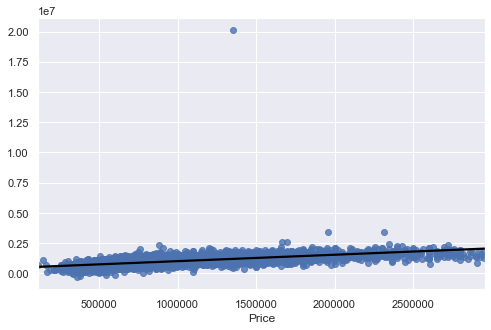

In [571]:
sns.regplot(y_test4,pred_y4,line_kws={'color':'black'})

### 2. Random Forest Regressor

In [418]:
modelR = RandomForestRegressor(n_estimators=200)
modelR.fit(X_train4, y_train4)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [419]:
modelR.predict(X_test4)

array([1214555.        , 1028140.5952381 ,  768454.78273307, ...,
        781819.54337463,  567897.83730159,  647351.44044397])

In [420]:
y_test4

26720    1300000.0
24421     520000.0
18857     860000.0
21860    2053000.0
14467     530000.0
           ...    
34385     780000.0
7261      320000.0
12024     530000.0
8472      400000.0
4805      460000.0
Name: Price, Length: 5354, dtype: float64

### Evaluation

In [421]:
pred_y4R = modelR.predict(X_test4)
pred_y4R

array([1214555.        , 1028140.5952381 ,  768454.78273307, ...,
        781819.54337463,  567897.83730159,  647351.44044397])

In [422]:
print(metrics.mean_absolute_error(y_test4,pred_y4R))
print(metrics.mean_squared_error(y_test4,pred_y4R))
rmserf = metrics.mean_squared_error(y_test4,pred_y4R)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4R)))

192481.70347506407
80682086865.05254
284045.92386628705


In [423]:
accrf = modelR.score(X_test4, y_test4)
accrf

0.6821775454278501

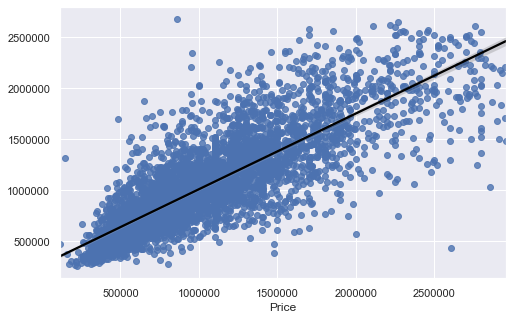

In [572]:
sns.regplot(y_test4,pred_y4R,line_kws={'color':'black'})

### 3. SVR

In [500]:
modelSVR = SVR()
modelSVR.fit(X_train4, y_train4)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Evaluation

In [501]:
pred_y4SVR = modelSVR.predict(X_test4)
pred_y4SVR

array([865027.34777031, 864841.95968584, 864770.63498324, ...,
       864746.59828925, 863798.50944319, 864999.61670254])

In [502]:
print(metrics.mean_absolute_error(y_test4,pred_y4SVR))
print(metrics.mean_squared_error(y_test4,pred_y4SVR))
rmsesv = metrics.mean_squared_error(y_test4,pred_y4SVR)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4SVR)))

377576.2074633943
270246309542.55444
519852.19970925816


In [503]:
accsv = modelSVR.score(X_test4,y_test4)
accsv

-0.06455284903002534

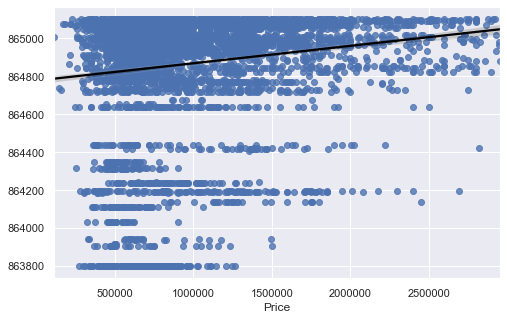

In [573]:
sns.regplot(y_test4,pred_y4SVR,line_kws={'color':'black'})

### Other Linear Models

In [428]:
# Other Linear models are also tested to find the improvement if any

### 4. LassoCV

In [505]:
_grid = {"alphas":np.arange(0.0001,0.001,0.00001)}
_cv =ShuffleSplit(n_splits=30, test_size=400, random_state=0)

In [ ]:
modelLa = LassoCV(cv=_cv,**_grid)
modelLa.fit(X_train3,y_train3)

### Evaluation

In [510]:
pred_y4La = modelLa.predict(X_test3)
pred_y4La

array([ 668430.28953458, 1532675.45944318,  870475.78765158, ...,
        409390.70579102,  839580.57313045, 1032489.83569735])

In [511]:
print(metrics.mean_absolute_error(y_test3,pred_y4La))
print(metrics.mean_squared_error(y_test3,pred_y4La))
rmsela = metrics.mean_squared_error(y_test3,pred_y4La)
print(np.sqrt(metrics.mean_squared_error(y_test3,pred_y4La)))

297899.9533946932
157067896177.82297
396317.9231094942


In [512]:
accla = modelLa.score(X_test3,y_test3)
accla

0.4114127870613359

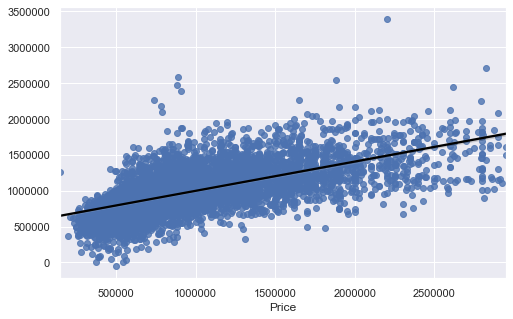

In [574]:
sns.regplot(y_test3,pred_y4La,line_kws={'color':'black'})

### 5. RidgeCV

In [513]:
_grid = {"alphas":np.arange(2,2.2,0.01)}
_cv =ShuffleSplit(n_splits=30, test_size=400, random_state=0)

In [514]:
modelRi = RidgeCV(cv =_cv, **_grid)

In [515]:
modelRi.fit(X_train3,y_train3)

RidgeCV(alphas=array([2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1 ,
       2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ]),
        cv=ShuffleSplit(n_splits=30, random_state=0, test_size=400, train_size=None),
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

### Evaluation

In [516]:
pred_y4Ri = modelRi.predict(X_test3)
pred_y4Ri

array([ 668432.52951426, 1532619.04733403,  870495.80245207, ...,
        409432.99346912,  839594.87917186, 1032471.09111248])

In [517]:
print(metrics.mean_absolute_error(y_test3,pred_y4Ri))
print(metrics.mean_squared_error(y_test3,pred_y4Ri))
rmseri = metrics.mean_squared_error(y_test3,pred_y4Ri)
print(np.sqrt(metrics.mean_squared_error(y_test3,pred_y4Ri)))

297898.9875358056
157066391446.93
396316.02471629885


In [518]:
modelRi.score(X_train3,y_train3)

0.4243218333708348

In [519]:
accri = modelRi.score(X_test3,y_test3)
accri

0.41141842580345994

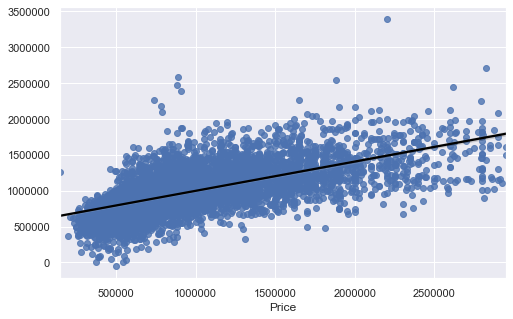

In [575]:
sns.regplot(y_test3,pred_y4Ri,line_kws={'color':'black'})

### 6. ElasticNet

In [520]:
_grid = {"alphas" : np.arange(0.0001,0.001,0.00005),
         "l1_ratio" : [.1, .5, .7, .9, .95, .96, .97,.98, .99, 1]}
_cv =ShuffleSplit(n_splits=30, test_size=400, random_state=0)

In [ ]:
modelEN = ElasticNetCV(cv =_cv,max_iter=1e5, **_grid)
modelEN.fit(X_train3,y_train3)

### Evaluation

In [522]:
pred_y4EN = modelEN.predict(X_test3)
pred_y4EN

array([ 668430.28953457, 1532675.45944313,  870475.78765154, ...,
        409390.70579109,  839580.57313041, 1032489.83569735])

In [523]:
print(metrics.mean_absolute_error(y_test3,pred_y4EN))
print(metrics.mean_squared_error(y_test3,pred_y4EN))
rmseen = metrics.mean_squared_error(y_test3,pred_y4EN)
print(np.sqrt(metrics.mean_squared_error(y_test3,pred_y4EN)))

297899.9533946921
157067896177.82397
396317.9231094955


In [524]:
modelEN.score(X_train3,y_train3)

0.4243218572374147

In [525]:
accen = modelEN.score(X_test3,y_test3)
accen

0.4114127870613321

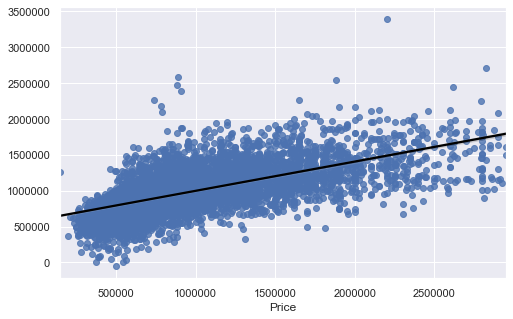

In [576]:
sns.regplot(y_test3,pred_y4EN,line_kws={'color':'black'})

## Advanced Regression Models

### 7. XGB Regressor

In [447]:
model = XGBRegressor(n_estimators = 500)
model.fit(X_train4, y_train4)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [448]:
model.predict(X_test4)

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1037855.  ,  796347.8 ,  806877.3 , ...,  801935.75,  450301.34,
        639917.75], dtype=float32)

In [449]:
y_test4

26720    1300000.0
24421     520000.0
18857     860000.0
21860    2053000.0
14467     530000.0
           ...    
34385     780000.0
7261      320000.0
12024     530000.0
8472      400000.0
4805      460000.0
Name: Price, Length: 5354, dtype: float64

### Evaluation

In [450]:
pred_y4x = model.predict(X_test4)
pred_y4x

array([1037855.  ,  796347.8 ,  806877.3 , ...,  801935.75,  450301.34,
        639917.75], dtype=float32)

In [451]:
print(metrics.mean_absolute_error(y_test4,pred_y4x))
print(metrics.mean_squared_error(y_test4,pred_y4x))
rmsexg = metrics.mean_squared_error(y_test4,pred_y4x)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4x)))

190425.0761886557
78070724184.32321
279411.388787793


In [452]:
model.score(X_train4, y_train4)

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.8545408442775919

In [453]:
accxg = model.score(X_test4, y_test4)
accxg

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.6924642116410786

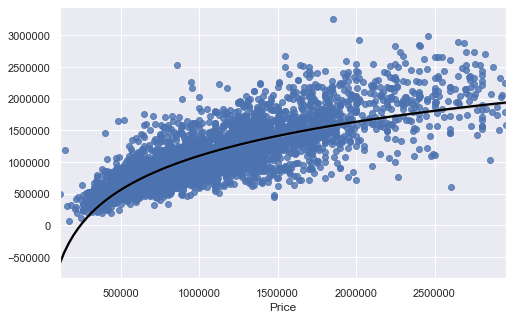

In [570]:
sns.regplot(y_test4,pred_y4x,line_kws={'color':'black'}, logx = True)

## 8. GradientBoostingRegressor

In [454]:
params = {'learning_rate': 0.06700000000000003,'max_depth': 5,'min_samples_leaf': 5,'min_samples_split': 15,'subsample': 0.1}
modelsGBR= GradientBoostingRegressor(verbose=False,random_state=0, loss='huber', **params)
modelsGBR.fit(X_train4,y_train4)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.06700000000000003,
                          loss='huber', max_depth=5, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=5,
                          min_samples_split=15, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=0, subsample=0.1,
                          tol=0.0001, validation_fraction=0.1, verbose=False,
                          warm_start=False)

### Evaluation

In [455]:
pred_y4GBR = modelsGBR.predict(X_test4)
pred_y4GBR

array([1200853.08715144,  761667.9665119 ,  766607.74376062, ...,
        768692.47862228,  635469.32002256,  688700.15982066])

In [456]:
print(metrics.mean_absolute_error(y_test4,pred_y4GBR))
print(metrics.mean_squared_error(y_test4,pred_y4GBR))
rmsegb = metrics.mean_squared_error(y_test4,pred_y4GBR)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4GBR)))

193204.1653414746
78308035189.60898
279835.72893683356


In [457]:
modelsGBR.score(X_train4,y_train4)

0.7138544857510825

In [458]:
accgb = modelsGBR.score(X_test4,y_test4)
accgb

0.6915293973703093

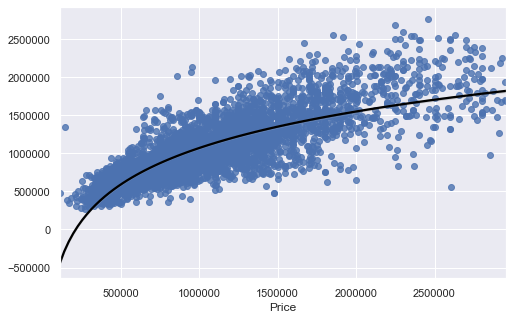

In [577]:
sns.regplot(y_test4,pred_y4GBR,line_kws={'color':'black'}, logx = True)

## 9. LightGBM

In [459]:
params = {'learning_rate': 0.018999999999999996,'min_child_samples': 20,'min_split_gain': 0,
          'n_estimators': 500,'reg_alpha': 0.03,'reg_lambda': 0.02,'subsample': 1}
modelsLGB = LGBMRegressor(silent=True, random_state=0, max_depth=-1, **params)
modelsLGB.fit(X_train4,y_train4)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.018999999999999996,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0, n_estimators=500, n_jobs=-1, num_leaves=31,
              objective=None, random_state=0, reg_alpha=0.03, reg_lambda=0.02,
              silent=True, subsample=1, subsample_for_bin=200000,
              subsample_freq=0)

### Evaluation

In [460]:
modelsLGB.score(X_train4,y_train4)

0.7560721081157371

In [461]:
acclg = modelsLGB.score(X_test4,y_test4)
acclg

0.7155741990581028

In [462]:
pred_y4LGB = modelsLGB.predict(X_test4)
pred_y4LGB

array([1141041.98763353,  771565.69061299,  827449.21607693, ...,
        772925.13341838,  622364.78502288,  657114.91761727])

In [463]:
print(metrics.mean_absolute_error(y_test4,pred_y4LGB))
print(metrics.mean_squared_error(y_test4,pred_y4LGB))
rmselg = metrics.mean_squared_error(y_test4,pred_y4LGB)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4LGB)))

185560.79146445333
72204046152.58792
268708.1058557555


In [464]:
pred_y4lgb = modelsLGB.predict(X_test4)

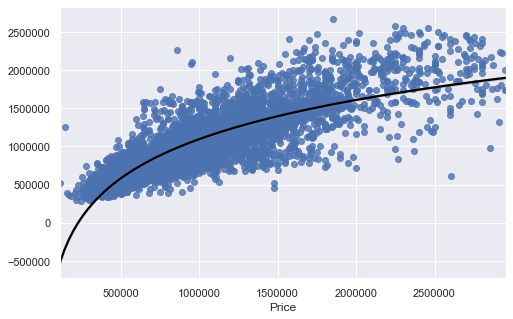

In [578]:
sns.regplot(y_test4,pred_y4lgb,line_kws={'color':'black'},logx = True)

## 10. CatBoost

In [466]:
params = {'learning_rate': 0.02299,'max_depth': 6,'n_estimators': 500,'reg_alpha': 0.001,'reg_lambda': 0.41,'subsample': 0.5}
modelsCB = CatBoostRegressor(random_state=0, verbose=False)
modelsCB.fit(X_train4,y_train4)

### Evaluation

In [467]:
pred_y4CB = modelsCB.predict(X_test4)
pred_y4CB

array([1104717.63392583,  775071.09423434,  776344.72917846, ...,
        831167.31572048,  583153.25391198,  634939.05719237])

In [468]:
print(metrics.mean_absolute_error(y_test4,pred_y4CB))
print(metrics.mean_squared_error(y_test4,pred_y4CB))
rmsecb = metrics.mean_squared_error(y_test4,pred_y4CB)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4CB)))

183513.83196782036
70828684534.8163
266136.58999622037


In [469]:
modelsCB.score(X_train4,y_train4)

0.775568522143537

In [470]:
acccb = modelsCB.score(X_test4,y_test4)
acccb

0.7209920163490168

In [471]:
pred_y4cb = modelsCB.predict(X_test4)

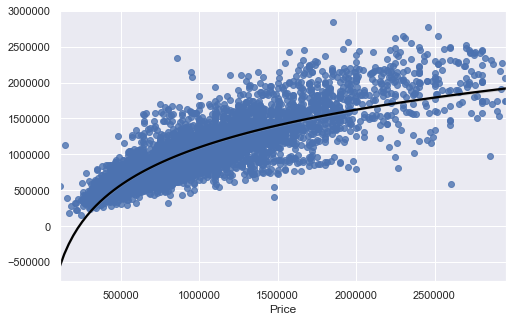

In [581]:
sns.regplot(y_test4,pred_y4cb,line_kws={'color':'black'},logx = True)

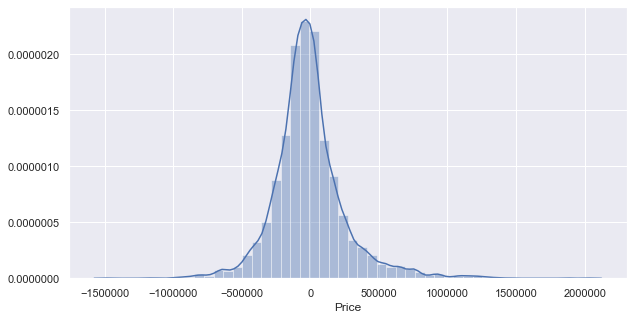

In [474]:
sns.distplot((y_test4-pred_y4cb))

## 11.  linear mixture

In [475]:
### Linear regression, LassoCV, RidgeCV, Elastic Net - modelLa, modelRi, modelEN, lm4

In [ ]:
# names = ["xgbm","lightgbr","sk_gbr"]
modelsmixlin = StackingRegressor(regressors= [modelLa,modelRi,modelEN,lm4],
                                   meta_regressor=CatBoostRegressor(verbose=False),
                                   use_features_in_secondary=True)
modelsmixlin.fit(X_train4,y_train4)

### Evaluation

In [477]:
pred_y4al = modelsmixlin.predict(X_test4)
pred_y4al

array([1080315.6609228 ,  764129.2894943 ,  763009.37909799, ...,
        824029.68833813,  603615.45065708,  637579.65278279])

In [478]:
print(metrics.mean_absolute_error(y_test4,pred_y4al))
print(metrics.mean_squared_error(y_test4,pred_y4al))
rmseal = metrics.mean_squared_error(y_test4,pred_y4al)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4al)))

183324.72291249497
70912505469.83073
266294.02071738435


In [479]:
modelsmixlin.score(X_train4,y_train4)

0.7809935232881455

In [480]:
accal = modelsmixlin.score(X_test4,y_test4)
accal

0.7206618293602323

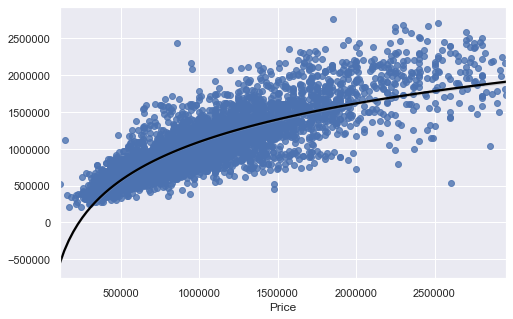

In [583]:
sns.regplot(y_test4,pred_y4al,line_kws={'color':'black'},logx = True)

## 12. Advanced Mixture

In [481]:
modelsmix = StackingRegressor(regressors= [modelsLGB,modelsGBR,modelsCB,model],
                                   meta_regressor=CatBoostRegressor(verbose=False),
                                   use_features_in_secondary=True)
modelsmix.fit(X_train4,y_train4)

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


StackingRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x000001EC2F6BDD08>,
                  refit=True,
                  regressors=[LGBMRegressor(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.018999999999999996,
                                            max_depth=-1, min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0, n_estimators=500,
                                            n_jobs=-1,...
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                       

### Evaluation

In [482]:
pred_y4av = modelsmix.predict(X_test4)
pred_y4av

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1005443.43783389,  852879.12613805,  805311.09662558, ...,
        808396.73272996,  434020.81598807,  653653.304819  ])

In [483]:
print(metrics.mean_absolute_error(y_test4,pred_y4av))
print(metrics.mean_squared_error(y_test4,pred_y4av))
rmseam = metrics.mean_squared_error(y_test4,pred_y4av)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4av)))

197293.71692965497
84853252832.66632
291295.8167098634


In [484]:
modelsmix.score(X_train4,y_train4)

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.8681149044179642

In [485]:
accam = modelsmix.score(X_test4,y_test4)
accam

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.6657465102654583

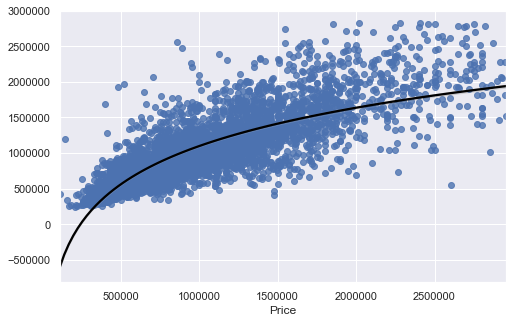

In [584]:
sns.regplot(y_test4,pred_y4av,line_kws={'color':'black'},logx = True)

## 13. Combining Linear Advanced Mixture and Advanced Regression models mixture

In [ ]:
modelsmixC = StackingRegressor(regressors= [modelsmixlin,modelsmix],
                                   meta_regressor=CatBoostRegressor(verbose=False),
                                   use_features_in_secondary=True)
modelsmixC.fit(X_train4,y_train4)

### Evaluation

In [487]:
pred_y4avC = modelsmixC.predict(X_test4)
pred_y4avC

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1034078.44083328,  904069.56926827,  811817.60091712, ...,
        811807.60970395,  420529.93702677,  651484.14280584])

In [488]:
print(metrics.mean_absolute_error(y_test4,pred_y4avC))
print(metrics.mean_squared_error(y_test4,pred_y4avC))
rmseac = metrics.mean_squared_error(y_test4,pred_y4avC)
print(np.sqrt(metrics.mean_squared_error(y_test4,pred_y4avC)))

199036.81003139442
86685402129.53705
294423.84775954724


In [546]:
modelsmixC.score(X_train4,y_train4)

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.87204257108309

In [547]:
accac = modelsmixC.score(X_test4,y_test4)
accac

Z:\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.6585293173382596

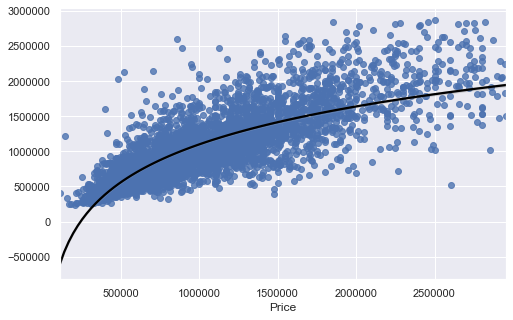

In [585]:
sns.regplot(y_test4,pred_y4avC,logx = True, line_kws={'color':'black'})

### Comparison Plots - Both the errors and accuracy of training and testing models

### Experimental Analysis and Comparison

In [548]:
Results = { 'Regressors': ['Linear Regression', 'SVR', 'LassoCV', 'RidgeCV', 'ElasticNet', 'RandomForest', 'XGBRegressor', 'GradientBoosting', 'LightGBM', 'CatBoost', 'Linearmix', 'Advancedmixture', 'mixlinear_advanced'],
            'RMSE' : [rmselm,rmsesv,rmsela,rmseri,rmseen,rmserf,rmsexg,rmsegb,rmselg,rmsecb,rmseal,rmseam,rmseac],
             'Accuracy' : [acclm,accsv,accla,accri,accen,accrf,accxg,accgb,acclg,acccb,accal,accam,accac],
          }

#### RMSE Plot for different Regression algorithms

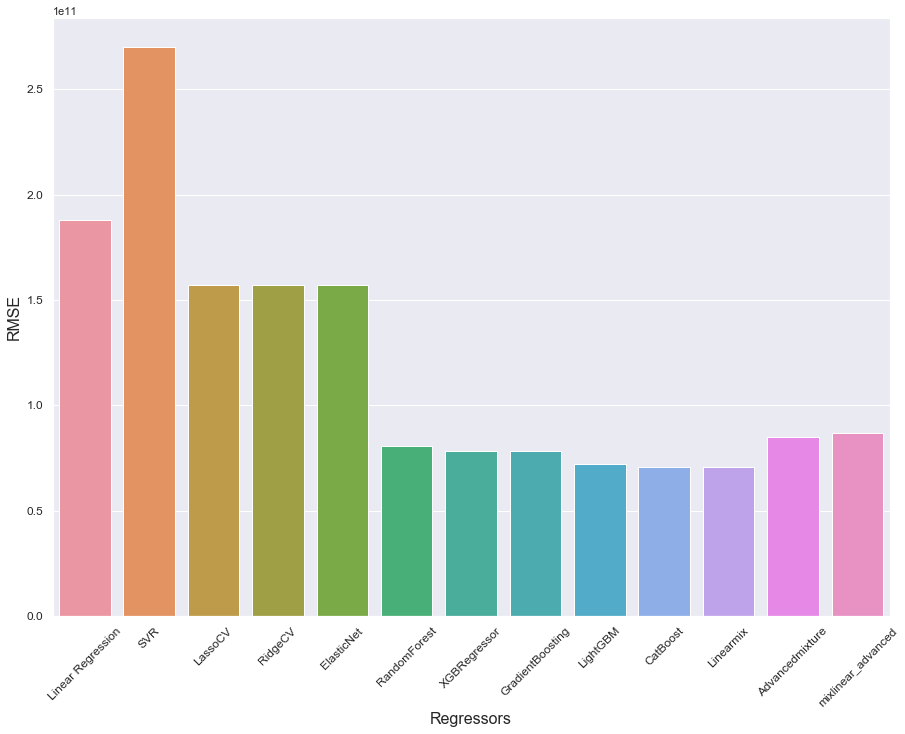

In [549]:
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['RMSE'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Accuracy plot for different regression algorithms

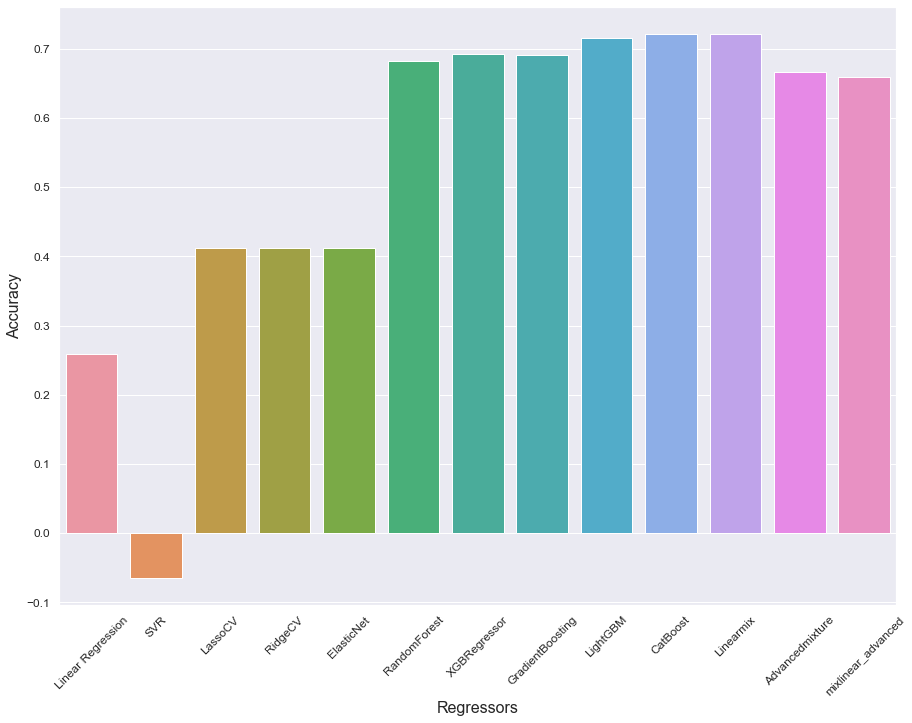

In [550]:
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['Accuracy'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Concluding Statements:
    
    The linear models exhibit more bias, if the model is tried to fit with more features, it will produce a overfit leading
    to loss of testing accuracy. The linear models do not best fit the model. The advanced regression models better fit the 
    data compared to linear models. The advanced models such as XGB Regressor, GradientBoosting, LightGBM and CatBoost exhibit high accuracy. The CatBoost performs the highest compared to all other algorithms.
    
    The mixture models using stacking is also performed to obtain better training accuracy. The Advanced linear mix improves
    linear regression models while the advanced mixture do not enhance individual advanced regression methods.
    The mix of linear mixture and advanced mixture is also tried which produces better training accuracy whereas the test
    accuracy does not seem to improve.
    
    The advanced regression methods such as LightGBM, CatBoost and mixture of linear models performs the best.
    The CatBoost provides the accurate predictions with the provided dataset.